In [1]:
%cd /content/drive/MyDrive/htcl/series_rnn_weather

/content/drive/MyDrive/htcl/series_rnn_weather


In [2]:
!nvidia-smi

Sun Nov 12 05:21:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

In [4]:
# Set up parameters for data processing and model training
batch_size = 100
window_size = 120
shuffle_buffer_size = 1000

In [5]:
# Selecting the dataset to use
name = "dataSET_ESTACION_ESPAM.csv"  # First dataset
# name = "dataSET_POWERDATA.csv"  # Second dataset, uncomment to use

In [6]:
# Reading the dataset
df = pd.read_csv(name, sep=';')
print(list(df.columns))

['fecha', 'humedad_rela', 'temp_min', 'temp_max', 'temp_ambiente', 'evaporacion', 'precipitacion', 'viento_km']


In [7]:
# Setting up columns based on the chosen dataset
# First dataset columns
nombres = ['Humedad Relativa', 'Temperatura Minima', 'Temperatura Maxima', 'Precipitacion', 'Velocidad del viento']
columnas = ['humedad_rela', 'temp_min', 'temp_max', 'precipitacion', 'viento_km']

In [8]:
# Uncomment for second dataset columns
# nombres = ['Precipitacion', 'Velocidad del viento', "Humedad", 'Temperatura Maxima', 'Temperatura Minima']
# columnas = ['precipitacion', 'velocidad_viento', 'humedad', 'temp_max', 'temp_min']

In [9]:
n = 3  # Selecting the column for analysis
df = df[columnas]

In [10]:
df.head()

,humedad_rela,temp_min,temp_max,precipitacion,viento_km
0,77.0,33.2,19.4,0.1,761.0
1,77.0,32.4,21.8,0.0,651.0
2,78.0,32.4,22.4,0.0,1030.0
3,82.0,27.8,20.4,0.1,450.0
4,79.0,28.8,20.4,0.0,511.0


In [11]:
columna = columnas[n]
titulo = nombres[n]
print(n, columna, titulo)

3 precipitacion Precipitacion


In [12]:
# Data visualization and preprocessing
series = df[columnas[n]]
time_step = [i for i in range(len(series))]
print("Longitud de datos:", len(time_step))
print("Ultimo valor:", series[len(time_step)-1])
series = np.array(series)
time = np.array(time_step)

Longitud de datos: 3225
Ultimo valor: 0.0


<Figure size 1800x500 with 0 Axes>

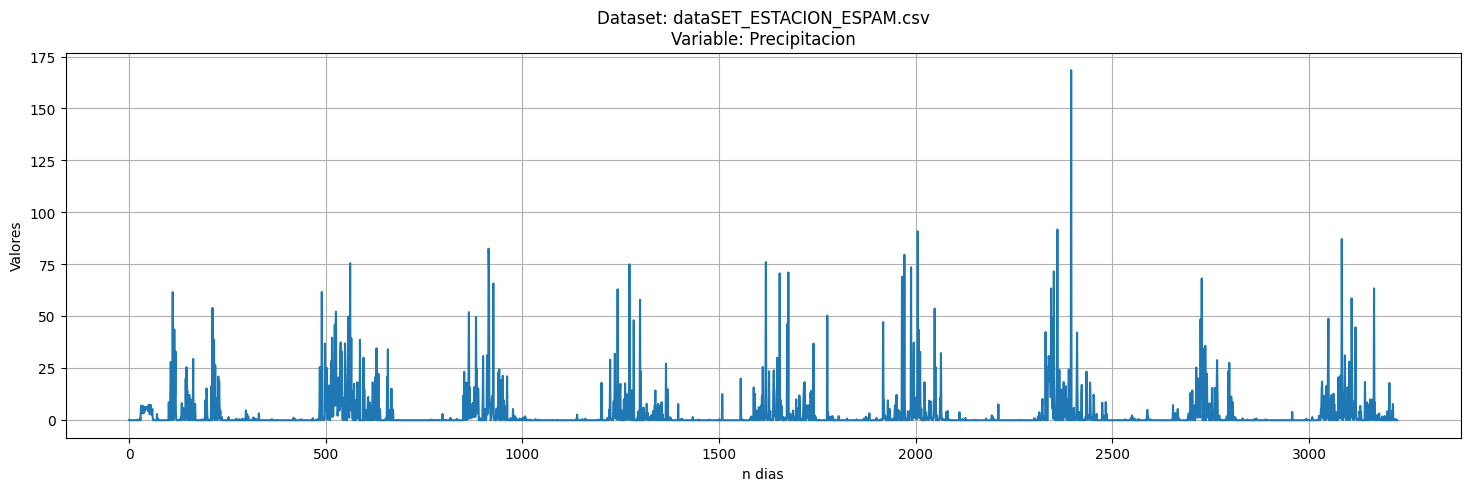

In [13]:
# Plotting the data
dims = (18, 5)
plt.figure(figsize=dims)
plot_tt(name, titulo, columna, time, series, dims=dims)
plt.show()

In [14]:
# Splitting data into training and validation sets
time_train, x_train, time_valid, x_valid, split_time = dividir(time_step, time, series)

2418


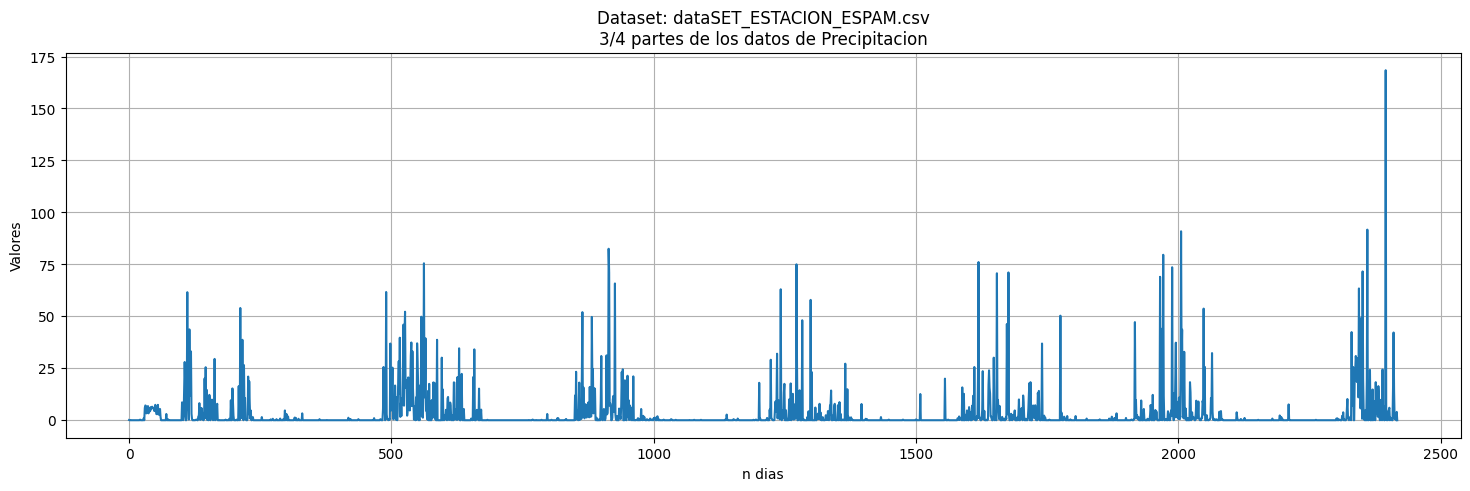

In [15]:
# Visualization of training data
plt.figure(figsize=dims)
plt.title("Dataset: {}\n3/4 partes de los datos de {}".format(name, titulo))
plt.xlabel("n dias")
plt.ylabel("Valores")
plt.plot(x_train)
plt.grid(True)
plt.show()

In [16]:
# Neural network model setup
tf.random.set_seed(51)
np.random.seed(51)

model = modelo()  # Assuming 'modelo' is a custom function that returns a compiled TensorFlow model
optimizer = tf.keras.optimizers.SGD(learning_rate=51e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

In [17]:
# Preparing dataset for TensorFlow processing
ds = tensorial_preprocessing(x_train, batch_size=batch_size, window_size=window_size, shuffle_buffer_size=shuffle_buffer_size)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 60)          360       
                                                                 
 lstm (LSTM)                 (None, None, 60)          29040     
                                                                 
 lstm_1 (LSTM)               (None, None, 60)          29040     
                                                                 
 dense (Dense)               (None, None, 30)          1830      
                                                                 
 dense_1 (Dense)             (None, None, 10)          310       
                                                                 
 dense_2 (Dense)             (None, None, 1)           11        
                                                                 
 lambda (Lambda)             (None, None, 1)           0

In [18]:
# Training the model
history = model.fit(ds, epochs=150)

Epoch 1/150
23/23 [==============================] - 16s 38ms/step - loss: 7.2693 - mae: 7.7333
Epoch 2/150
23/23 [==============================] - 1s 26ms/step - loss: 4.1849 - mae: 4.5760
Epoch 3/150
23/23 [==============================] - 1s 26ms/step - loss: 3.4697 - mae: 3.8117
Epoch 4/150
23/23 [==============================] - 1s 24ms/step - loss: 3.1223 - mae: 3.4472
Epoch 5/150
23/23 [==============================] - 1s 28ms/step - loss: 2.9812 - mae: 3.2975
Epoch 6/150
23/23 [==============================] - 1s 26ms/step - loss: 2.9033 - mae: 3.2196
Epoch 7/150
23/23 [==============================] - 1s 24ms/step - loss: 2.8565 - mae: 3.1713
Epoch 8/150
23/23 [==============================] - 1s 26ms/step - loss: 2.8147 - mae: 3.1308
Epoch 9/150
23/23 [==============================] - 1s 25ms/step - loss: 2.7758 - mae: 3.0872
Epoch 10/150
23/23 [==============================] - 1s 25ms/step - loss: 2.7459 - mae: 3.0553
Epoch 11/150
23/23 [============================

In [19]:
# Extracting metrics from the training history
mae = history.history['mae'][-1]
loss = history.history['loss'][-1]
print("MAE: ", mae, "Loss: ", loss)

MAE:  2.682302474975586 Loss:  2.4303033351898193


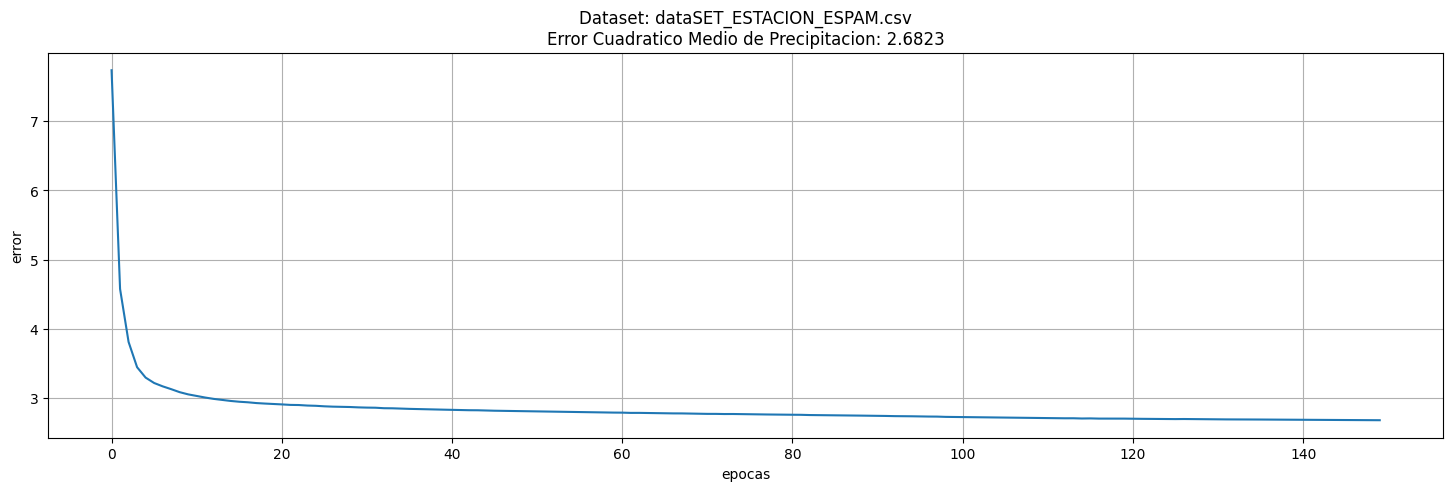

In [20]:
# Plotting the Mean Absolute Error (MAE)
plt.figure(figsize=(18, 5))
plt.title("Dataset: {}\nError Cuadratico Medio de {}: {:.4f}".format(name, titulo, mae))
plt.plot(history.history["mae"])
plt.ylabel("error")
plt.xlabel("epocas")
plt.grid(True)
plt.savefig("{}_{}_ecm.png".format(name.replace(".csv", ""), columna))
plt.show()

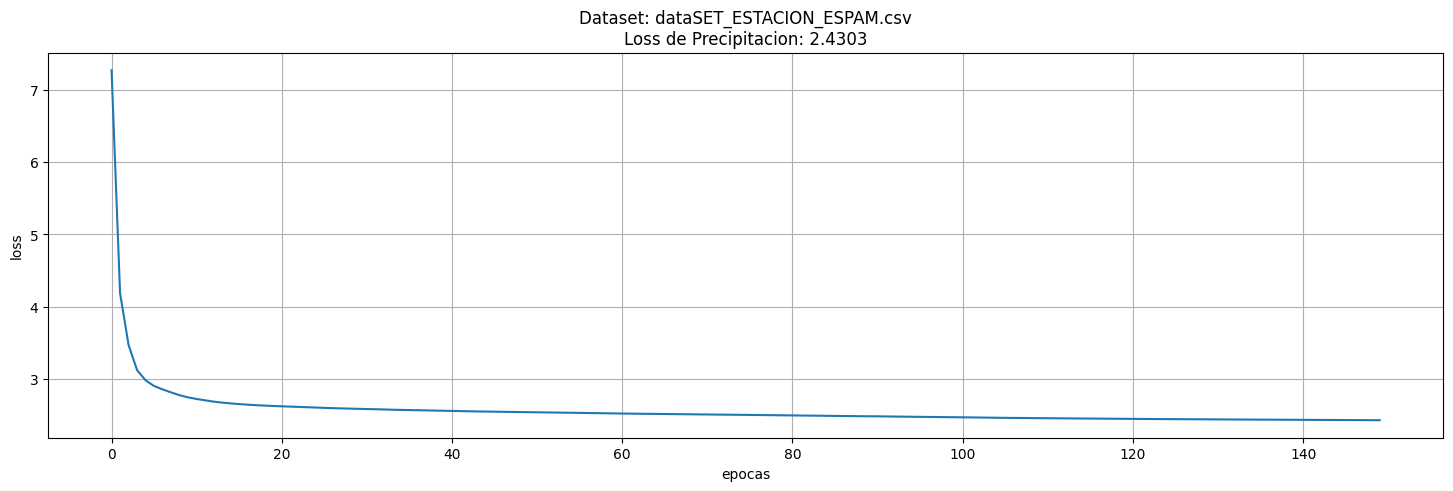

In [21]:
# Plotting the loss
plt.figure(figsize=(18, 5))
plt.title("Dataset: {}\nLoss de {}: {:.4f}".format(name, titulo, loss))
plt.plot(history.history["loss"])
plt.ylabel("loss")
plt.xlabel("epocas")
plt.grid(True)
plt.savefig("{}_{}_loss.png".format(name.replace(".csv", ""), columna))
plt.show()

In [22]:
# Forecasting using the trained model
dw, forecast, rnn_forecast = to_forecast(series=series, model=model, split_time=split_time, window_size=window_size, shuffle_buffer_size=shuffle_buffer_size)

98/98 [==============================] - 4s 19ms/step


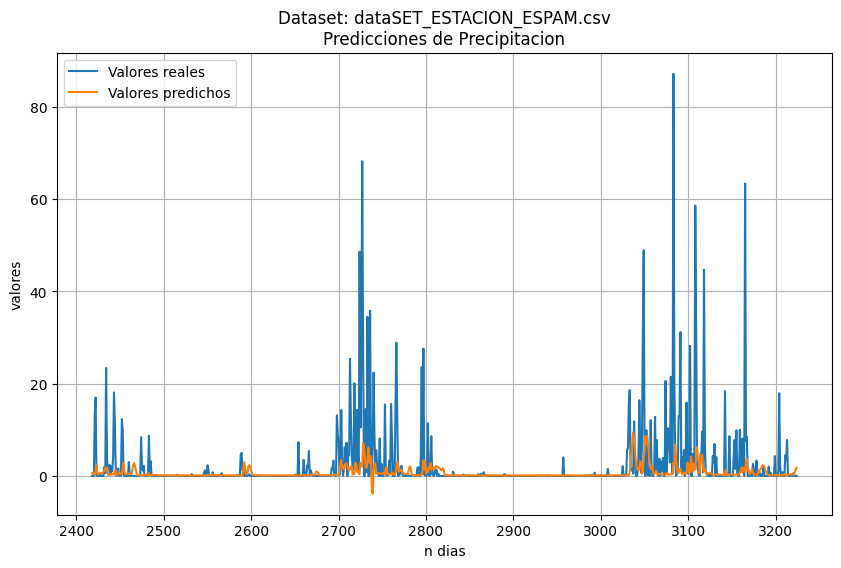

[3224]
[1.7854407]


In [26]:
# Comparing real values with predictions
plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, rnn_forecast)
plt.title("Dataset: {}\nPredicciones de {}".format(name, titulo))
plt.legend(['Valores reales', 'Valores predichos'])
plt.ylabel("valores")
plt.xlabel("n dias")
plt.grid(True)
plt.show()
print(time_valid[-1:])
print(rnn_forecast[-1:])

19/19 [==============================] - 0s 11ms/step


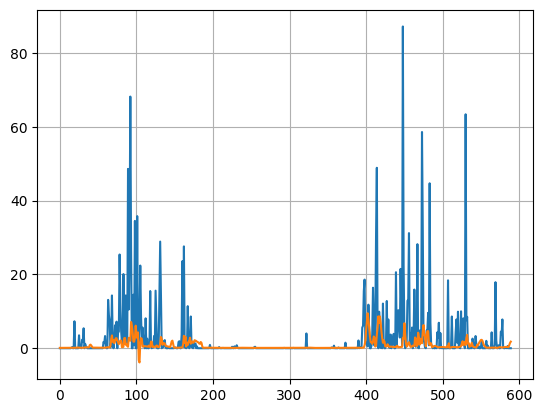

In [28]:
# Function for model forecasting
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

# Using the model forecast function
split_time = 2515
window_size = 120
rnn_forecast = model_forecast(model, series[split_time:, np.newaxis], window_size)
rnn_forecast = rnn_forecast[0:-1, -1, 0]
plt.plot(series[split_time+window_size:])
plt.plot(rnn_forecast)
plt.grid()